# LUT Verificaton

In [49]:
import scipy as sp
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import os 
import sys
%matplotlib inline
#%matplotlib notebook

## Load the random grid, and prepare all input files for LUT

0=rho, 1=P, 2=SoundSpeed, 3=Cp, 4=Entropy, 5=Mu, 6=Kt, 7=dpdrho_e, 8=dpde_rho, 9=dTdrho_e, 10=dTde_rho, 11=T, 12=StaticEnergy

In [85]:
randoms = sp.genfromtxt('random.dat', skip_header=1)
rho          = randoms[:,0];
P            = randoms[:,1];
SoundSpeed   = randoms[:,2];
Cp           = randoms[:,3];
Entropy      = randoms[:,4];
Mu           = randoms[:,5];
Kt           = randoms[:,6];
dPdrho_e     = randoms[:,7];
dPde_rho     = randoms[:,8];
dTdrho_e     = randoms[:,9];
dTde_rho     = randoms[:,10];
T            = randoms[:,11];
StaticEnergy = randoms[:,12];
Enthalpy     = randoms[:,13];

In [90]:
sp.savetxt('rhoe_in.dat',sp.column_stack((rho,StaticEnergy)), delimiter='\t')
sp.savetxt('PT_in.dat'  ,sp.column_stack((P,T)), delimiter='\t')
sp.savetxt("Prho_in.dat",sp.column_stack((P,rho)), delimiter='\t')
sp.savetxt("rhoT_in.dat",sp.column_stack((rho,T)), delimiter='\t')
sp.savetxt("Ps_in.dat"  ,sp.column_stack((P,Entropy)), delimiter='\t')
sp.savetxt("hs_in.dat"  ,sp.column_stack((Enthalpy,Entropy)), delimiter='\t')

## Define the error plotting function

In [91]:
def plot_error():
    plt.figure(figsize=(17,30))
    plt.subplot(7,2,1)
    plt.hist((interp_Temperature-T),bins=10,normed=True,color='g');
    plt.xlabel('Absolute temperature error ');
    plt.grid(which="both")
    plt.ylabel('Relative amount of sample points');
    plt.subplot(7,2,2)
    plt.hist((interp_Enthalpy-Enthalpy),bins=10,normed=True,color='g');
    plt.xlabel('Absolute Enthalpy error ');
    plt.grid(which="both")
    plt.ylabel('Relative amount of sample points');
    plt.subplot(7,2,3)
    plt.hist((interp_Entropy-Entropy),bins=10,normed=True,color='g');
    plt.xlabel('Absolute Entropy error ');
    plt.grid(which="both")
    plt.ylabel('Relative amount of sample points');
    plt.subplot(7,2,4)
    plt.hist((interp_StaticEnergy-StaticEnergy),bins=10,normed=True,color='g');
    plt.xlabel('Absolute StaticEnergy error ');
    plt.grid(which="both")
    plt.ylabel('Relative amount of sample points');
    plt.subplot(7,2,5)
    plt.hist((interp_Density-rho),bins=10,normed=True,color='g');
    plt.xlabel('Absolute Density error ');
    plt.grid(which="both")
    plt.ylabel('Relative amount of sample points');
    plt.subplot(7,2,6)
    plt.hist((interp_Pressure-P),bins=10,normed=True,color='g');
    plt.xlabel('Absolute Pressure error ');
    plt.grid(which="both")
    plt.ylabel('Relative amount of sample points');
    plt.subplot(7,2,7)
    plt.hist((interp_SoundSpeed2-SoundSpeed),bins=10,normed=True,color='g');
    plt.xlabel('Absolute SoundSpeed error ');
    plt.grid(which="both")
    plt.ylabel('Relative amount of sample points');
    plt.subplot(7,2,8)
    plt.hist((interp_dPdrho_e-dPdrho_e),bins=10,normed=True,color='g');
    plt.xlabel('Absolute dPdrho_e error ');
    plt.grid(which="both")
    plt.ylabel('Relative amount of sample points');
    plt.subplot(7,2,9)
    plt.hist((interp_dPde_rho-dPde_rho),bins=10,normed=True,color='g');
    plt.xlabel('Absolute dPde_rho error ');
    plt.grid(which="both")
    plt.ylabel('Relative amount of sample points');
    plt.subplot(7,2,10)
    plt.hist((interp_dTdrho_e-dTdrho_e),bins=10,normed=True,color='g');
    plt.xlabel('Absolute dTdrho_e error ');
    plt.grid(which="both")
    plt.ylabel('Relative amount of sample points');
    plt.subplot(7,2,11)
    plt.hist((interp_dTde_rho-dTde_rho),bins=10,normed=True,color='g');
    plt.xlabel('Absolute dTde_rho error ');
    plt.grid(which="both")
    plt.ylabel('Relative amount of sample points');
    plt.subplot(7,2,12)
    plt.hist((interp_Cp-Cp),bins=10,normed=True,color='g');
    plt.xlabel('Absolute Cp error ');
    plt.grid(which="both")
    plt.ylabel('Relative amount of sample points');
    plt.subplot(7,2,13)
    plt.hist((interp_Mu-Mu),bins=10,normed=True,color='g');
    plt.xlabel('Absolute Mu error ');
    plt.grid(which="both")
    plt.ylabel('Relative amount of sample points');
    plt.subplot(7,2,14)
    plt.hist((interp_Kt-Kt),bins=10,normed=True,color='g');
    plt.xlabel('Absolute Kt error ');
    plt.grid(which="both")
    plt.ylabel('Relative amount of sample points');
    return

## RUN the verification

In [92]:
for f in ("rhoe_out.dat","PT_out.dat", "Prho_out.dat","rhoT_out.dat","Ps_out.dat","hs_out.dat"):
    try:
         os.remove(f)
    except OSError:
         pass

os.system('Debug/TableReader>log')
with open('log') as l:
    l= l.readlines();

## RHOE 

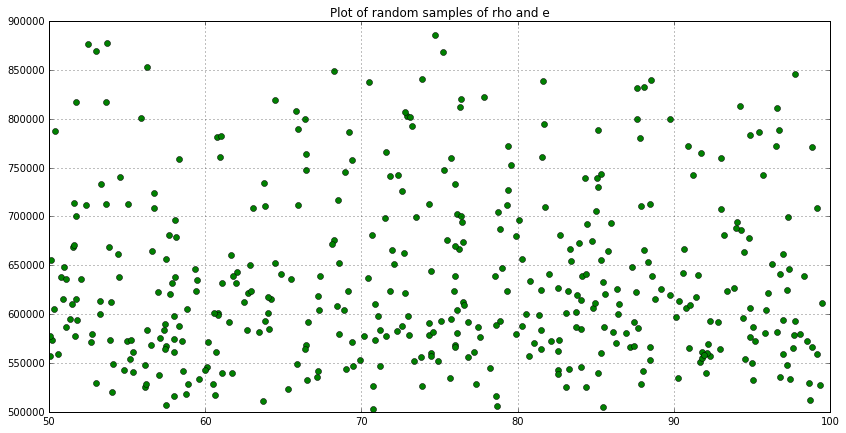

In [93]:
plt.figure(figsize=(14,7))
plt.title('Plot of random samples of rho and e')
plt.grid(which='both')
plt.plot(rho, StaticEnergy, 'go');

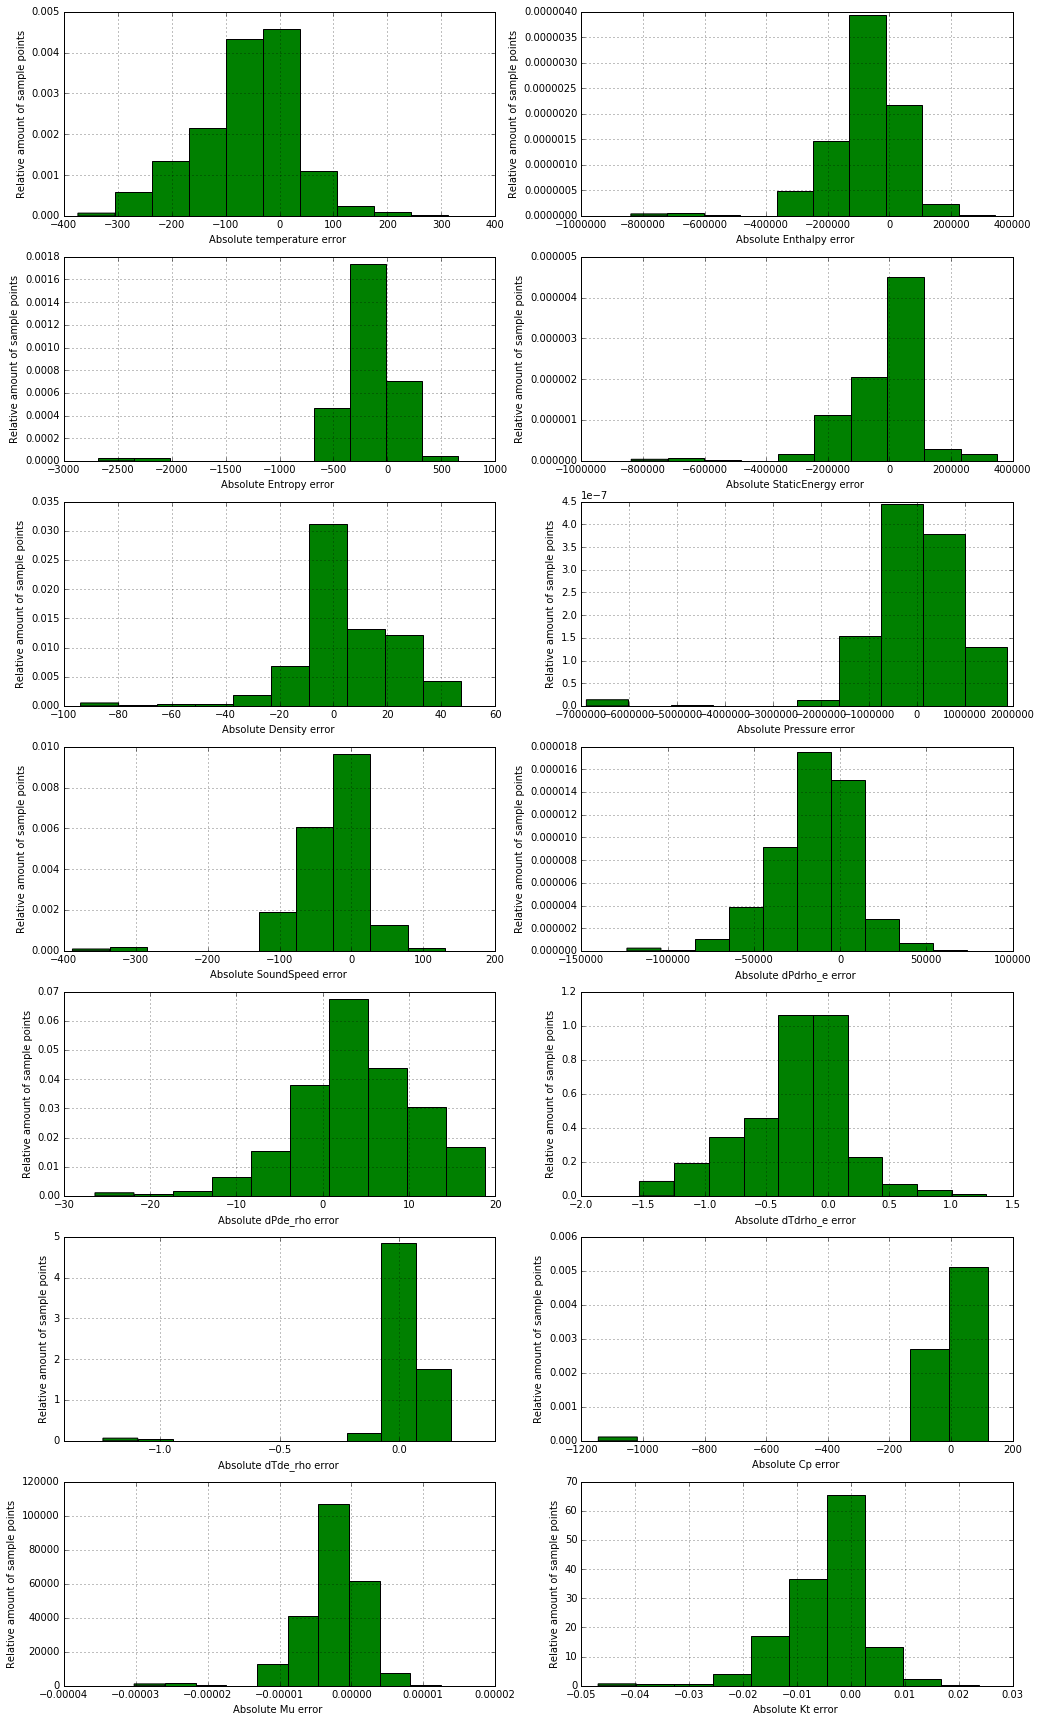

In [102]:
interp_data = sp.genfromtxt('rhoe_out.dat', delimiter=', ')
interp_Temperature  = interp_data[:,0];
interp_Density      = interp_data[:,1];
interp_Enthalpy     = interp_data[:,2];
interp_StaticEnergy = interp_data[:,3];
interp_Entropy      = interp_data[:,4];
interp_Pressure     = interp_data[:,5];
interp_SoundSpeed2  = interp_data[:,6];
interp_dPdrho_e     = interp_data[:,7];
interp_dPde_rho     = interp_data[:,8];
interp_dTdrho_e     = interp_data[:,9];
interp_dTde_rho     = interp_data[:,10];
interp_Cp           = interp_data[:,11];
interp_Mu           = interp_data[:,12];
#interp_dmudrho_T    = interp_data[:,13];
#interp_dmudT_rho    = interp_data[:,14];
interp_Kt           = interp_data[:,15];
#interp_dktdrho_T    = interp_data[:,16];
#interp_dktdT_rho    = interp_data[:,17];
plot_error();

## PT

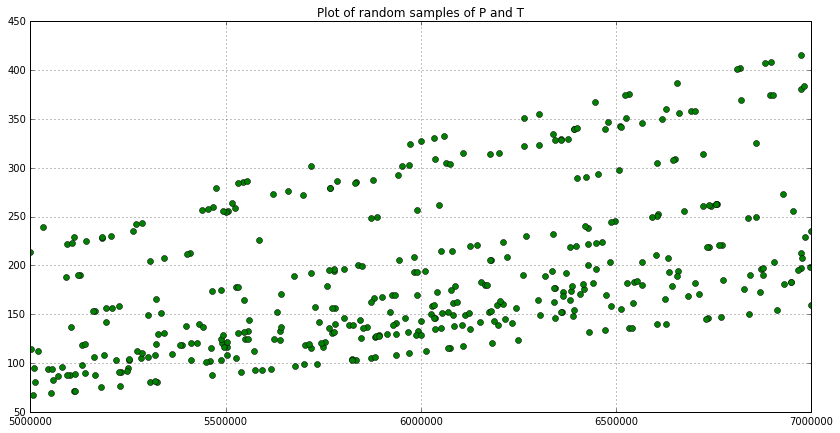

In [96]:
plt.figure(figsize=(14,7))
plt.title('Plot of random samples of P and T')
plt.grid(which='both')
plt.plot(P, T, 'go');

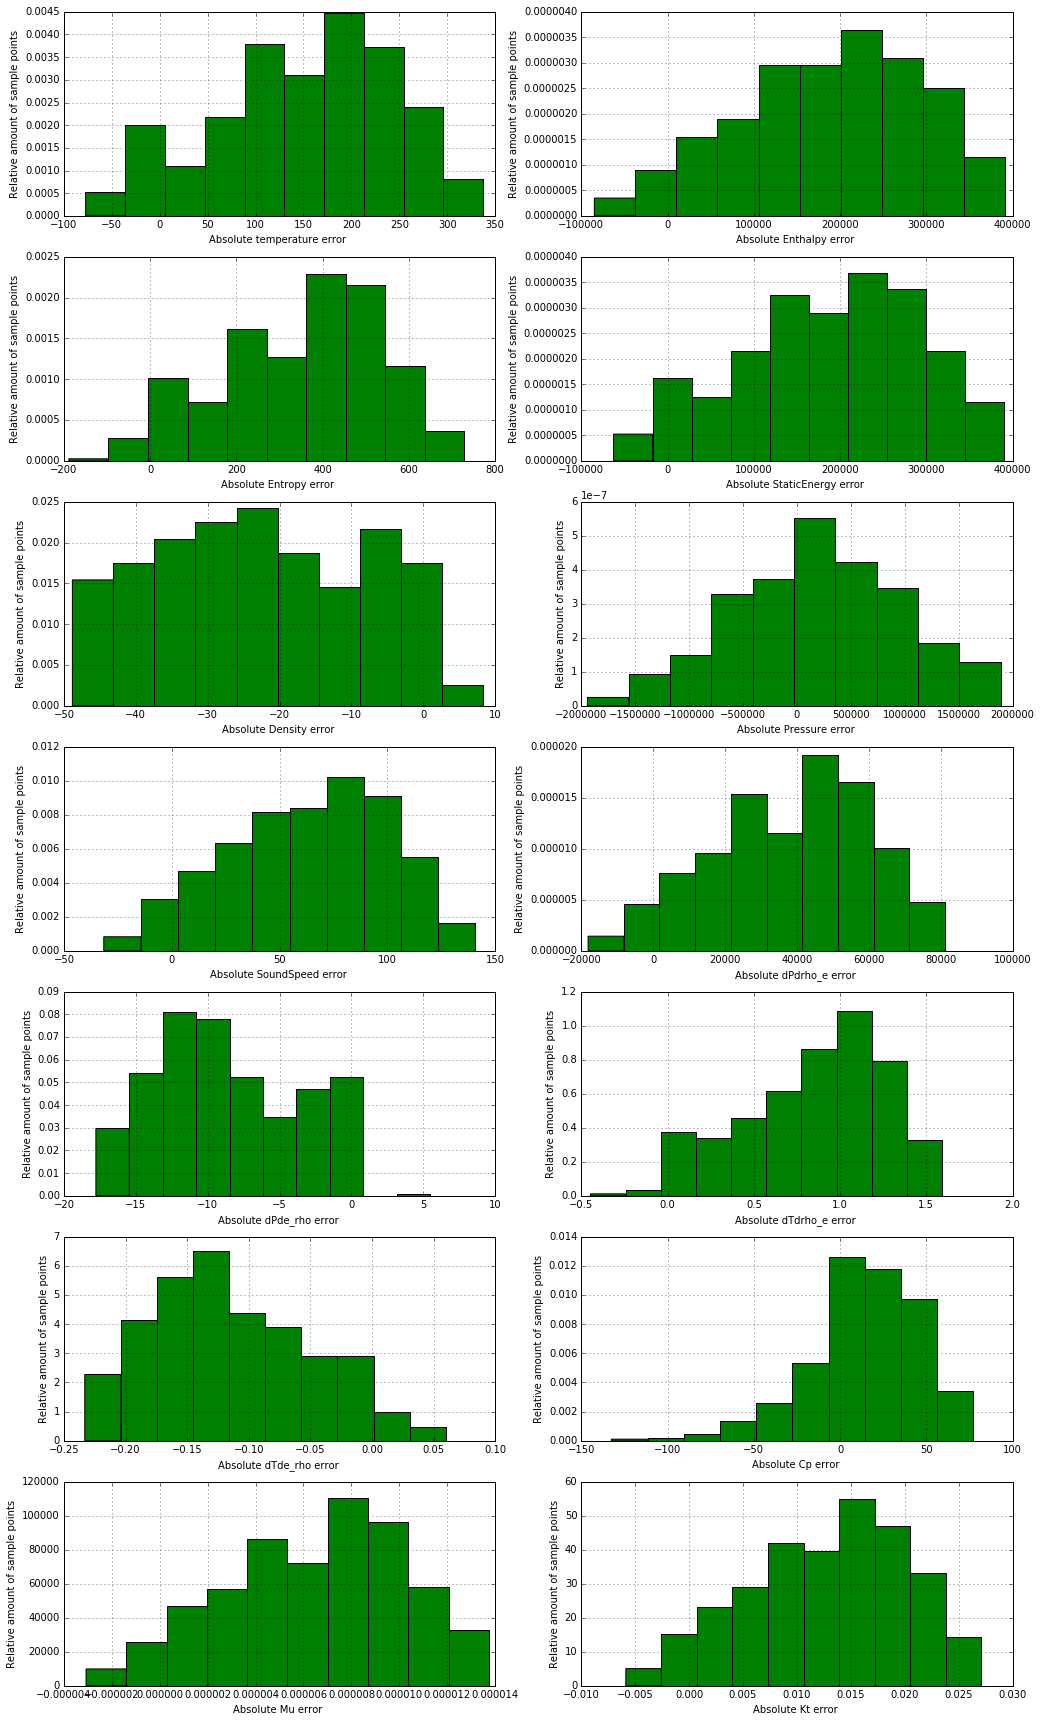

In [97]:
interp_data = sp.genfromtxt('PT_out.dat', delimiter=', ')
interp_Temperature  = interp_data[:,0];
interp_Density      = interp_data[:,1];
interp_Enthalpy     = interp_data[:,2];
interp_StaticEnergy = interp_data[:,3];
interp_Entropy      = interp_data[:,4];
interp_Pressure     = interp_data[:,5];
interp_SoundSpeed2  = interp_data[:,6];
interp_dPdrho_e     = interp_data[:,7];
interp_dPde_rho     = interp_data[:,8];
interp_dTdrho_e     = interp_data[:,9];
interp_dTde_rho     = interp_data[:,10];
interp_Cp           = interp_data[:,11];
interp_Mu           = interp_data[:,12];
#interp_dmudrho_T    = interp_data[:,13];
#interp_dmudT_rho    = interp_data[:,14];
interp_Kt           = interp_data[:,15];
#interp_dktdrho_T    = interp_data[:,16];
#interp_dktdT_rho    = interp_data[:,17];
plot_error();

## PRHO

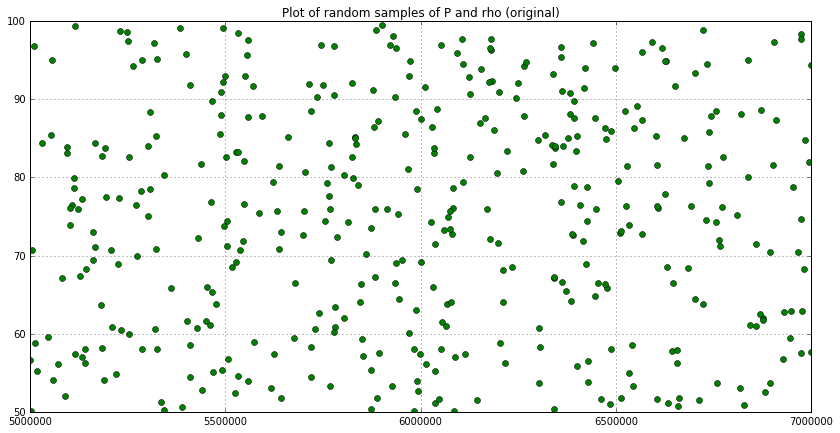

In [98]:
plt.figure(figsize=(14,7))
plt.title('Plot of random samples of P and rho (original)')
plt.grid(which='both')
plt.plot(P, rho, 'go');

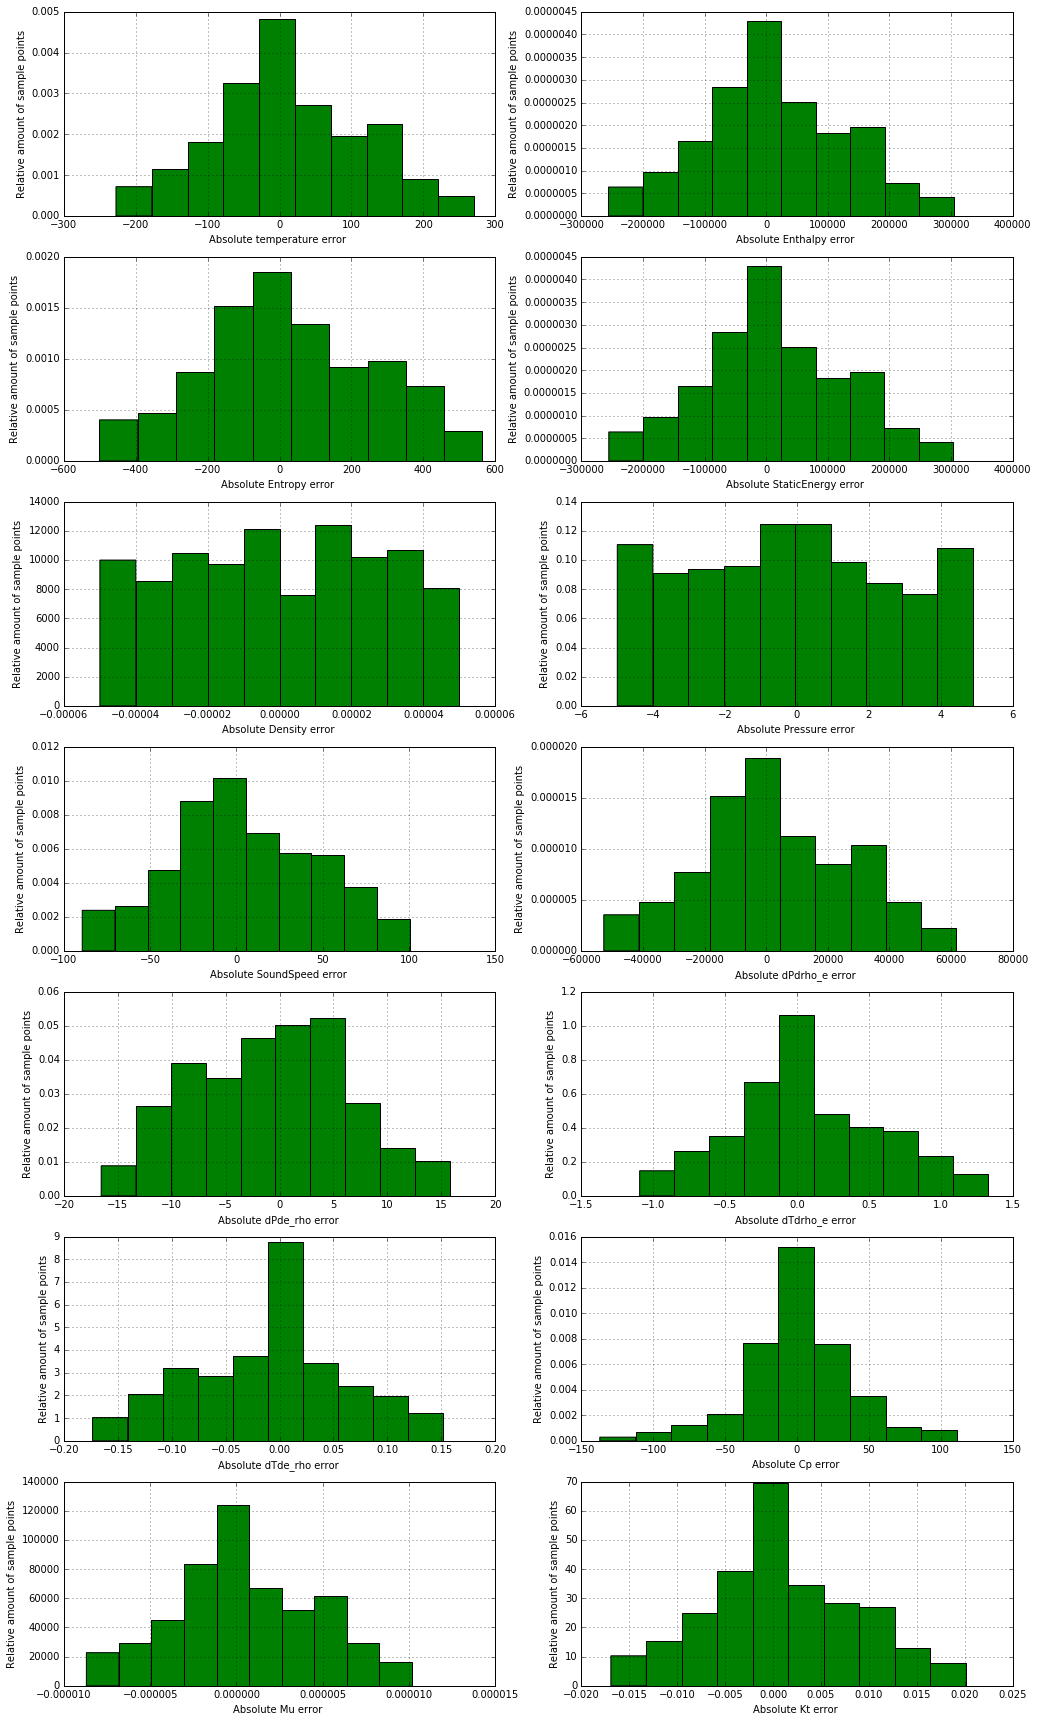

In [99]:
interp_data = sp.genfromtxt('Prho_out.dat', delimiter=', ')
interp_Temperature  = interp_data[:,0];
interp_Density      = interp_data[:,1];
interp_Enthalpy     = interp_data[:,2];
interp_StaticEnergy = interp_data[:,3];
interp_Entropy      = interp_data[:,4];
interp_Pressure     = interp_data[:,5];
interp_SoundSpeed2  = interp_data[:,6];
interp_dPdrho_e     = interp_data[:,7];
interp_dPde_rho     = interp_data[:,8];
interp_dTdrho_e     = interp_data[:,9];
interp_dTde_rho     = interp_data[:,10];
interp_Cp           = interp_data[:,11];
interp_Mu           = interp_data[:,12];
#interp_dmudrho_T    = interp_data[:,13];
#interp_dmudT_rho    = interp_data[:,14];
interp_Kt           = interp_data[:,15];
#interp_dktdrho_T    = interp_data[:,16];
#interp_dktdT_rho    = interp_data[:,17];
plot_error();

## RHOT

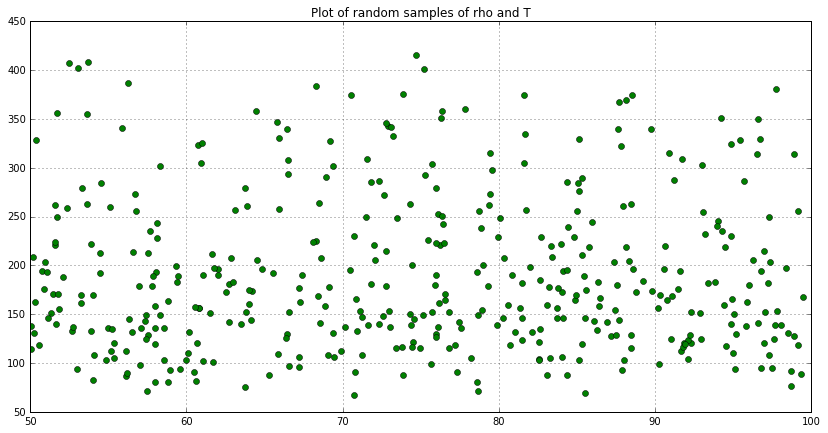

In [100]:
plt.figure(figsize=(14,7))
plt.title('Plot of random samples of rho and T')
plt.grid(which='both')
plt.plot(rho, T, 'go');

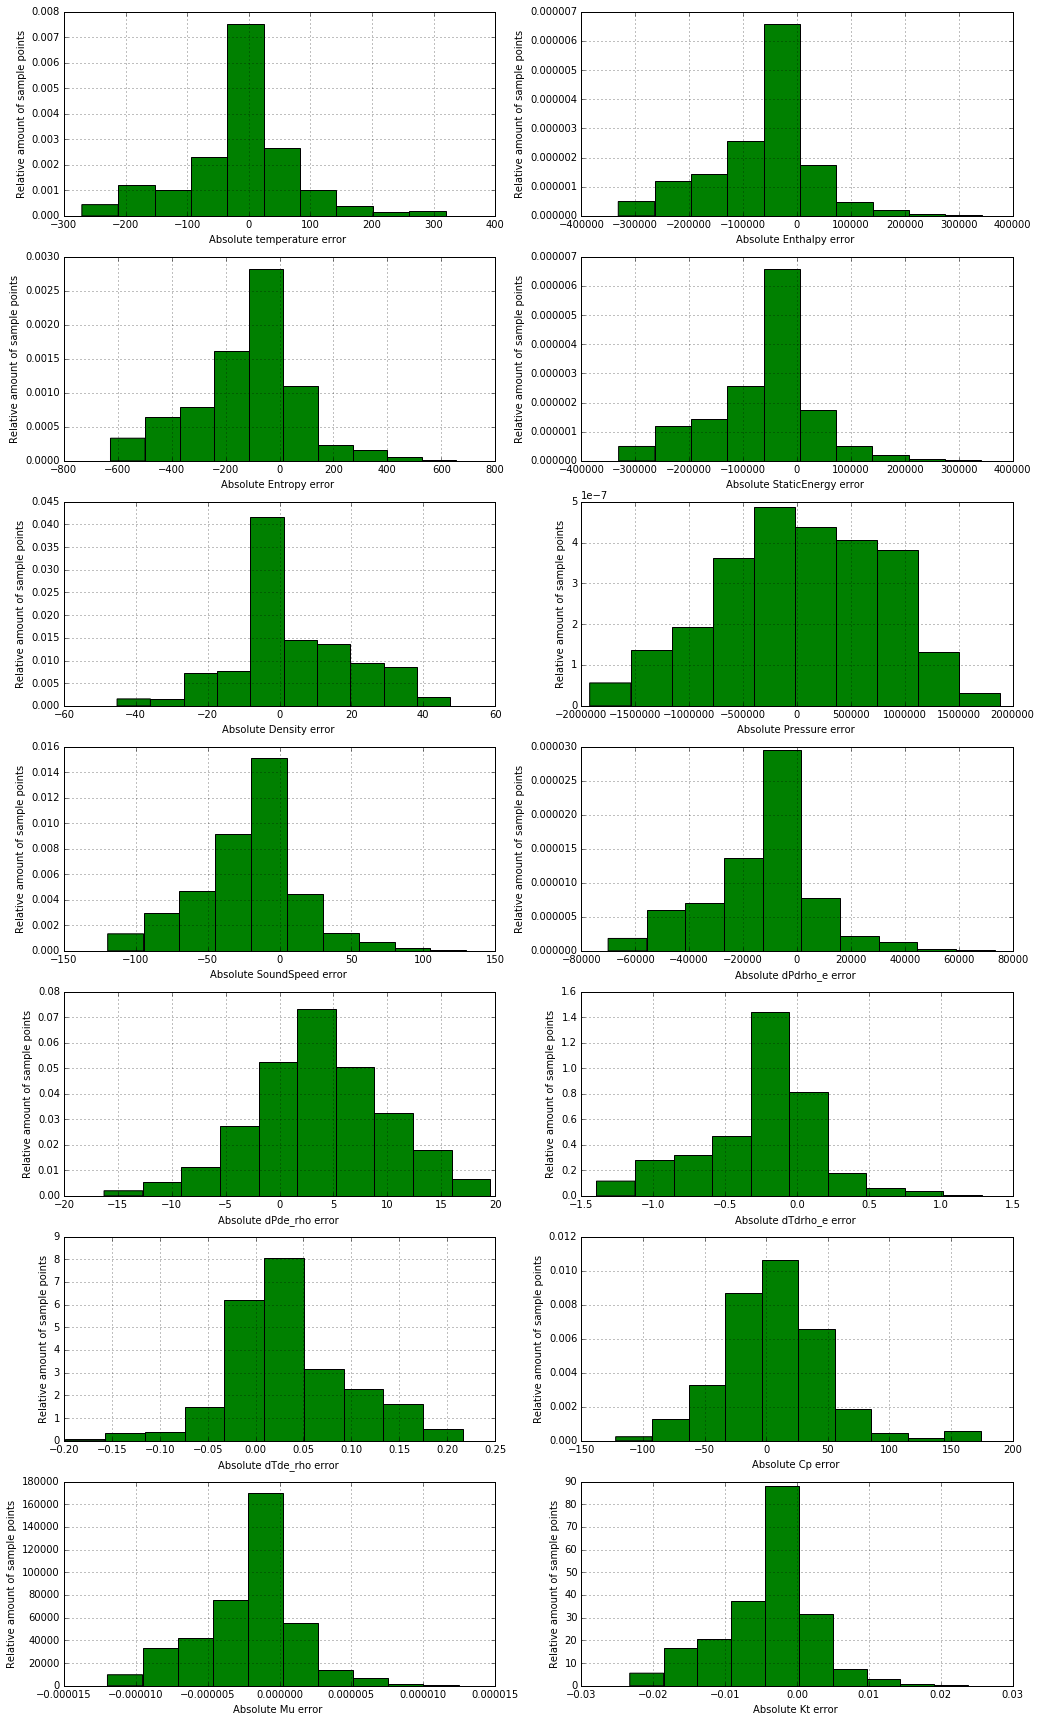

In [101]:
interp_data = sp.genfromtxt('rhoT_out.dat', delimiter=', ')
interp_Temperature  = interp_data[:,0];
interp_Density      = interp_data[:,1];
interp_Enthalpy     = interp_data[:,2];
interp_StaticEnergy = interp_data[:,3];
interp_Entropy      = interp_data[:,4];
interp_Pressure     = interp_data[:,5];
interp_SoundSpeed2  = interp_data[:,6];
interp_dPdrho_e     = interp_data[:,7];
interp_dPde_rho     = interp_data[:,8];
interp_dTdrho_e     = interp_data[:,9];
interp_dTde_rho     = interp_data[:,10];
interp_Cp           = interp_data[:,11];
interp_Mu           = interp_data[:,12];
#interp_dmudrho_T    = interp_data[:,13];
#interp_dmudT_rho    = interp_data[:,14];
interp_Kt           = interp_data[:,15];
#interp_dktdrho_T    = interp_data[:,16];
#interp_dktdT_rho    = interp_data[:,17];
plot_error();

## PS

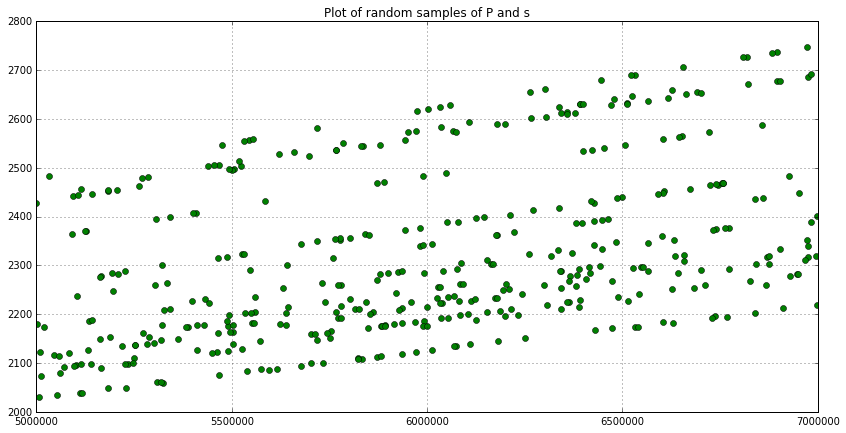

In [103]:
plt.figure(figsize=(14,7))
plt.title('Plot of random samples of P and s')
plt.grid(which='both')
plt.plot(P, Entropy, 'go');

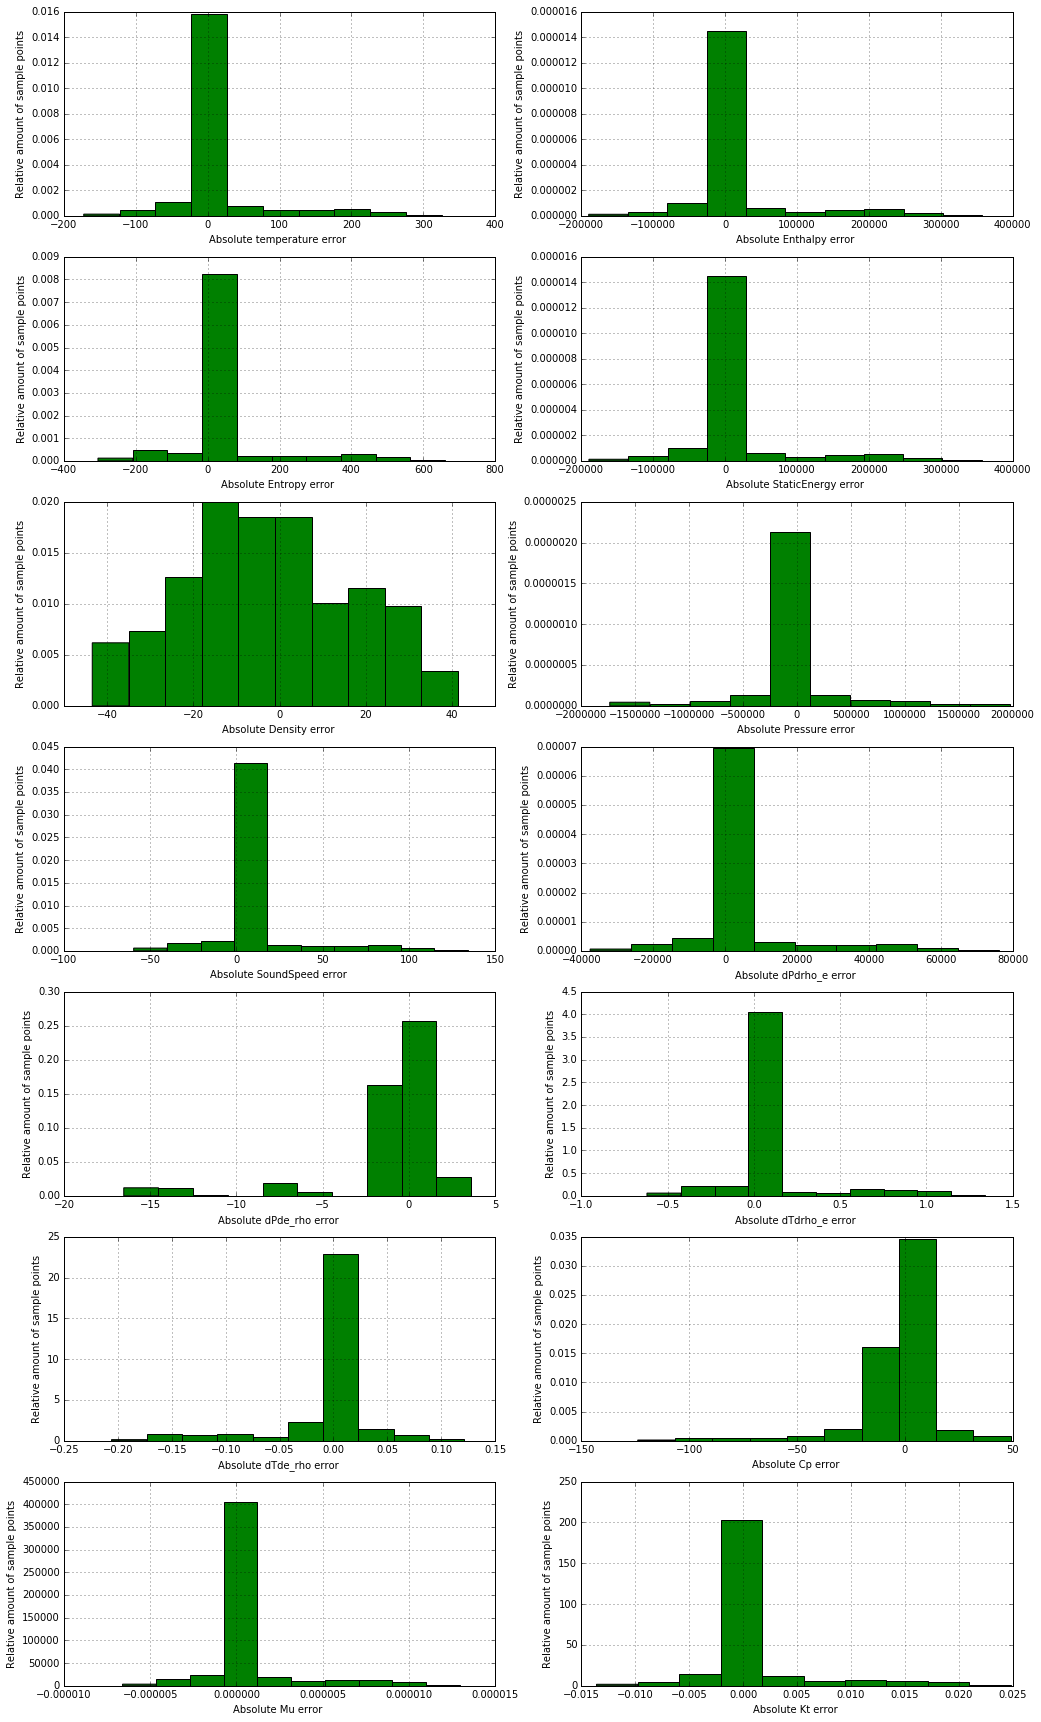

In [104]:
interp_data = sp.genfromtxt('Ps_out.dat', delimiter=', ')
interp_Temperature  = interp_data[:,0];
interp_Density      = interp_data[:,1];
interp_Enthalpy     = interp_data[:,2];
interp_StaticEnergy = interp_data[:,3];
interp_Entropy      = interp_data[:,4];
interp_Pressure     = interp_data[:,5];
interp_SoundSpeed2  = interp_data[:,6];
interp_dPdrho_e     = interp_data[:,7];
interp_dPde_rho     = interp_data[:,8];
interp_dTdrho_e     = interp_data[:,9];
interp_dTde_rho     = interp_data[:,10];
interp_Cp           = interp_data[:,11];
interp_Mu           = interp_data[:,12];
#interp_dmudrho_T    = interp_data[:,13];
#interp_dmudT_rho    = interp_data[:,14];
interp_Kt           = interp_data[:,15];
#interp_dktdrho_T    = interp_data[:,16];
#interp_dktdT_rho    = interp_data[:,17];
plot_error();

## HS

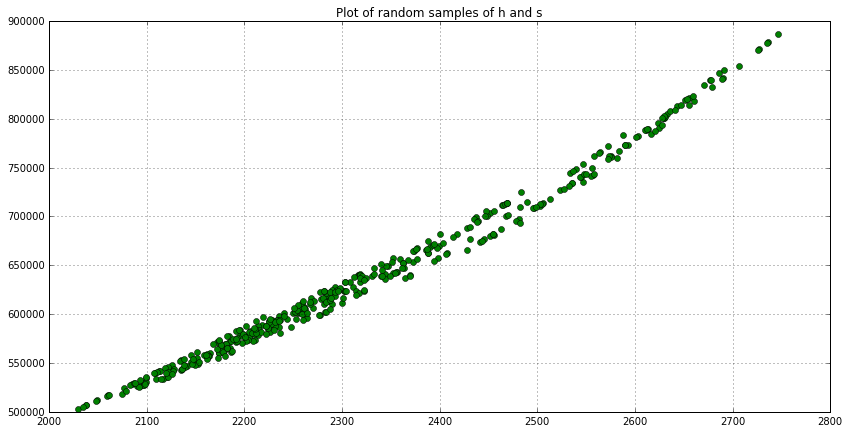

In [44]:
plt.figure(figsize=(14,7))
plt.title('Plot of random samples of h and s')
plt.grid(which='both')
plt.plot(Entropy, Enthalpy, 'go');

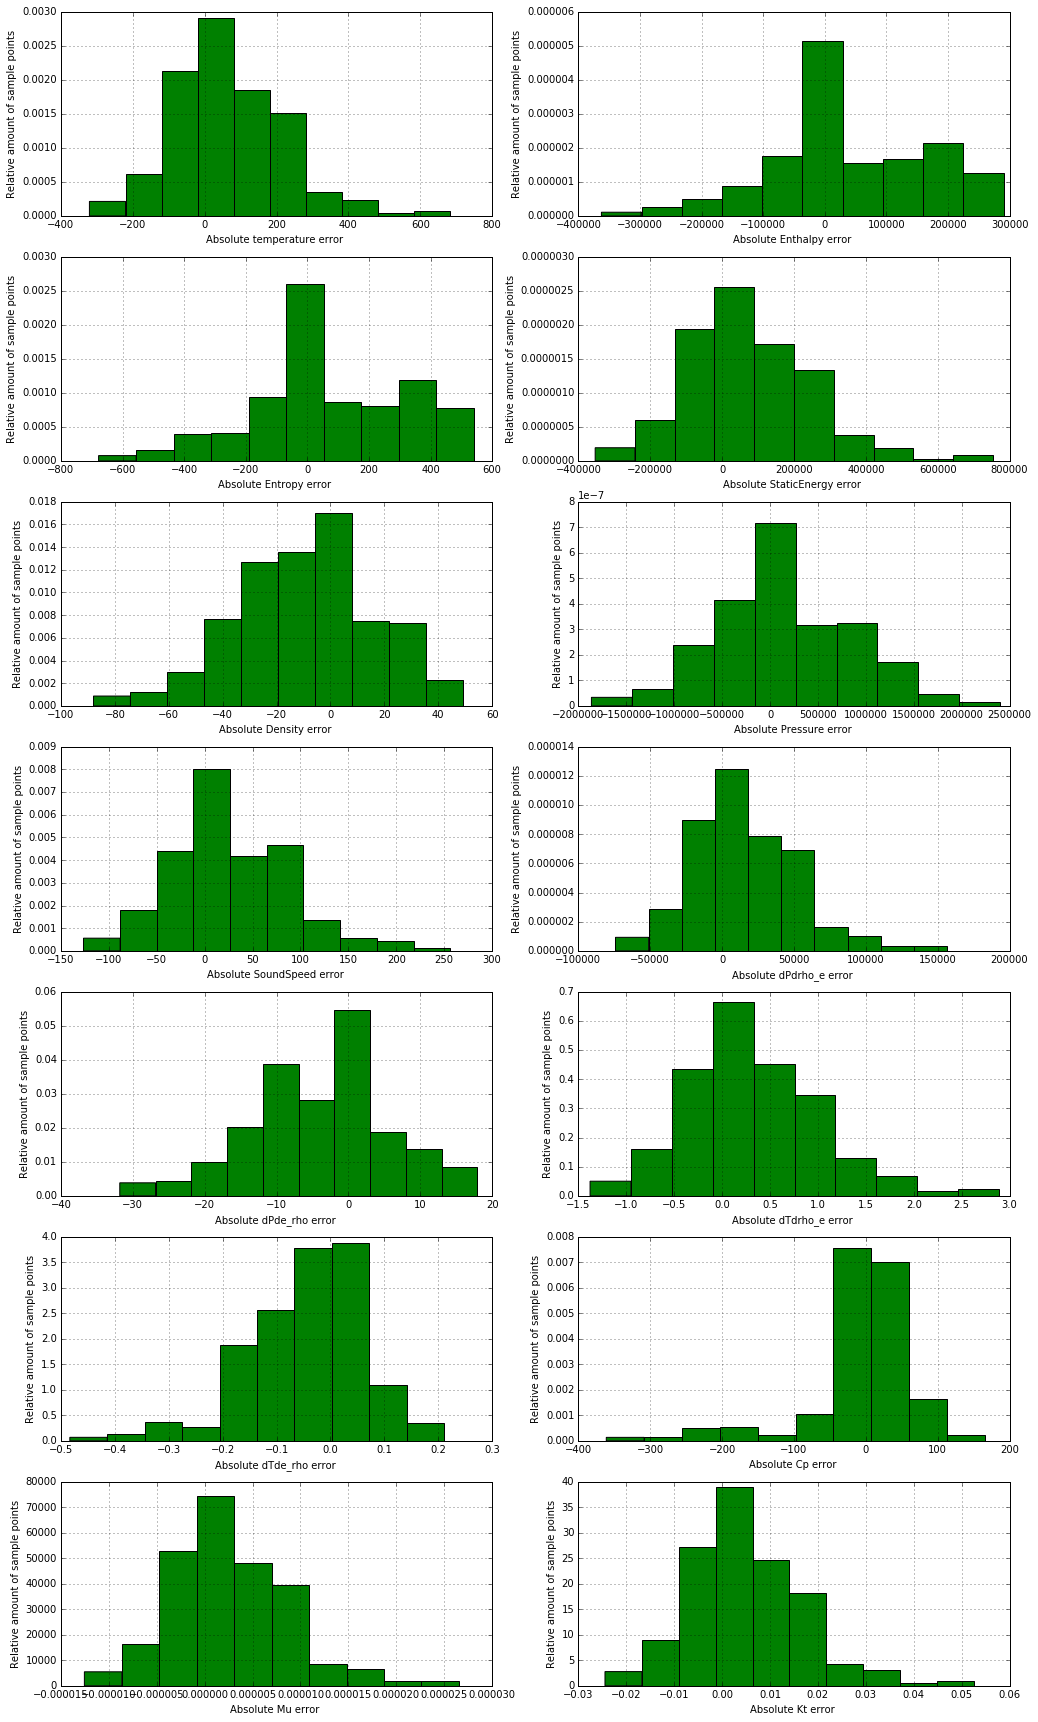

In [105]:
interp_data = sp.genfromtxt('hs_out.dat', delimiter=', ')
interp_Temperature  = interp_data[:,0];
interp_Density      = interp_data[:,1];
interp_Enthalpy     = interp_data[:,2];
interp_StaticEnergy = interp_data[:,3];
interp_Entropy      = interp_data[:,4];
interp_Pressure     = interp_data[:,5];
interp_SoundSpeed2  = interp_data[:,6];
interp_dPdrho_e     = interp_data[:,7];
interp_dPde_rho     = interp_data[:,8];
interp_dTdrho_e     = interp_data[:,9];
interp_dTde_rho     = interp_data[:,10];
interp_Cp           = interp_data[:,11];
interp_Mu           = interp_data[:,12];
#interp_dmudrho_T    = interp_data[:,13];
#interp_dmudT_rho    = interp_data[:,14];
interp_Kt           = interp_data[:,15];
#interp_dktdrho_T    = interp_data[:,16];
#interp_dktdT_rho    = interp_data[:,17];
plot_error();